In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


**Step.1: Import Modules**

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Step. 2: Load Dataset**

In [4]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [5]:
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Step.3: Statistical Information**

In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Step.4: Exploratory Data Analysis**

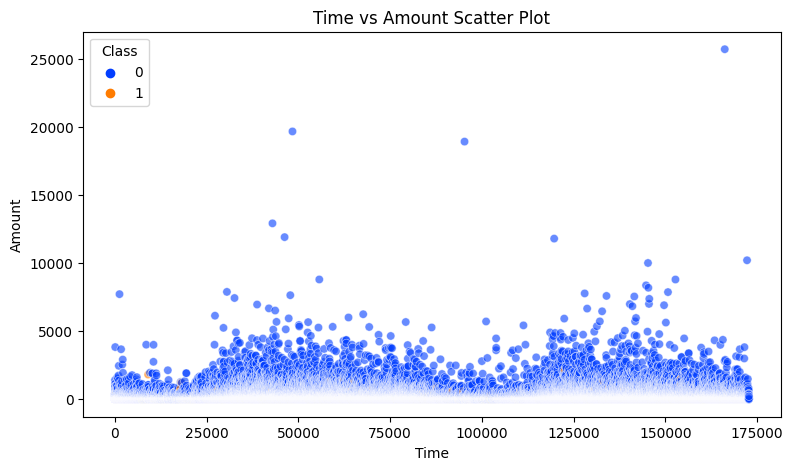

In [10]:
# Time vs Amount scatter plot
plt.figure(figsize=(9,5))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='bright', alpha= 0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

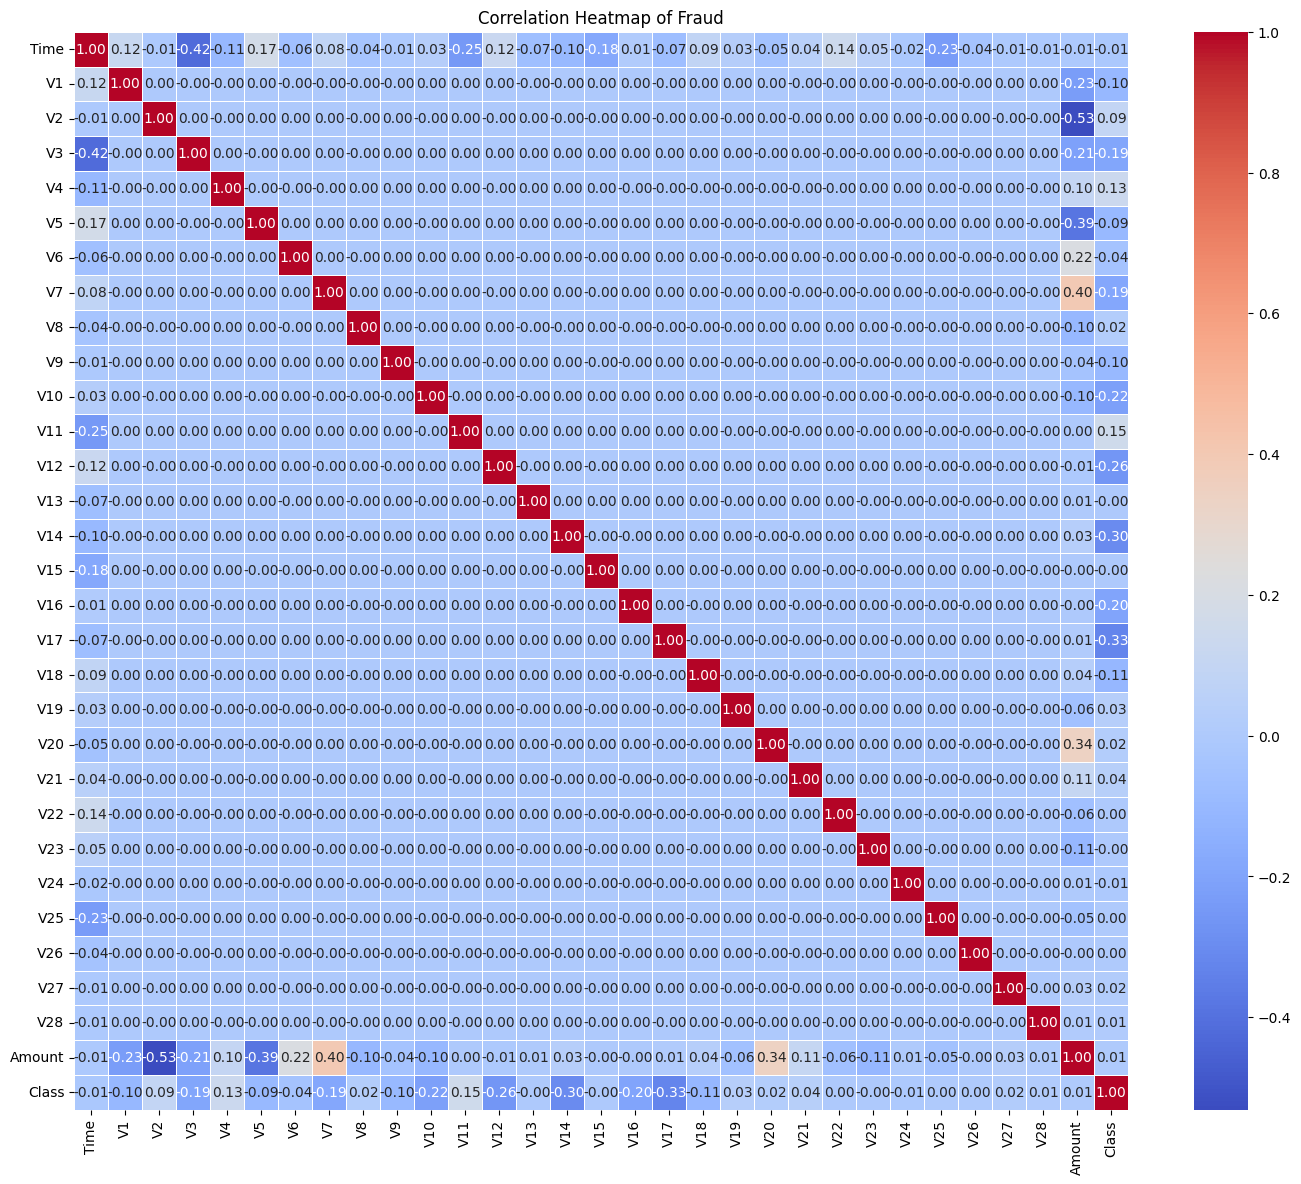

In [11]:
#  Correlation heatmap
plt.figure(figsize=(17, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Fraud')
plt.show()

**Step.5: Data Normalization**

In [12]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [13]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df[['Amount']] = ss.fit_transform(df[['Amount']])

In [15]:
df= df.drop(['Time'], axis=1)

In [16]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


**Check if any duplicated values**

In [17]:
df.duplicated().any()

True

In [18]:
df= df.drop_duplicates()

In [19]:
df.shape

(275663, 30)

**Step.6: Handling Imbalanced Dataset**

In [20]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [21]:
normal= df[df['Class']==0]
fraud= df[df['Class']==1]

In [22]:
normal.shape

(275190, 30)

In [23]:
fraud.shape

(473, 30)

**NB: Hence this shows that data is highly imbalanced**

**Step.7: Define X Target and Y features**

In [24]:
X = df.drop('Class', axis=1)
y = df['Class']

In [25]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


**Step.8: Train Test Split**

**Logistic Regression**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [28]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
# Make predictions
y_pred1 = log_reg.predict(X_test)


In [30]:
print('Accuracy:', accuracy_score(y_test, y_pred1))
print("Classification report:\n",classification_report(y_test, y_pred1))

Accuracy: 0.9446655038337148
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.91      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



**Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Make predictions
y_pred2 = dt.predict(X_test)

In [33]:
print('Accuracy:', accuracy_score(y_test, y_pred2))
print("Classification report:\n",classification_report(y_test, y_pred2))

Accuracy: 0.9981467349831026
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



**Random Forest Classifer**

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Make predictions
y_pred3 = rf.predict(X_test)

In [36]:
print('Accuracy:', accuracy_score(y_test, y_pred3))
print("Classification report:\n",classification_report(y_test, y_pred3))

Accuracy: 0.9999273229405138
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



**Gradient Boosting**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [38]:
# Make predictions
y_pred4 = gb.predict(X_test)

In [39]:
print('Accuracy:', accuracy_score(y_test, y_pred4))
print("Classification report:\n",classification_report(y_test, y_pred4))

Accuracy: 0.976052908899306
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     55073
           1       0.99      0.97      0.98     55003

    accuracy                           0.98    110076
   macro avg       0.98      0.98      0.98    110076
weighted avg       0.98      0.98      0.98    110076



**Step.9 : Final Model Selection**

**Hence we choose Random Forest as a model, because its Precision, Recall and F1 score are almost accurate**

**Calculating ROC-AUC Curve**

In [40]:
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

**NB: It is used to get the predicted probabilities for the positive class (fraud in this case) rather than just the predicted class labels.**

In [41]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.9999997162598664


* The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score is a commonly used metric to evaluate the performance of binary classifiers, especially in imbalanced datasets. This metric requires the predicted probabilities rather than the class labels.
* The ROC AUC score measures the ability of the model to distinguish between the positive and negative classes. It is based on the true positive rate (sensitivity) and false positive rate across different threshold settings, which is why predicted probabilities are needed.
* In many applications, the default threshold of 0.5 for classifying instances may not be optimal, especially in imbalanced datasets. By using predicted probabilities, you can adjust the threshold to better balance precision and recall based on the specific needs of your application.
* Predicted probabilities provide insights into how confident the model is about its predictions. This can be useful for decision-making processes where the confidence level matters.

In [42]:
# Calculate the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

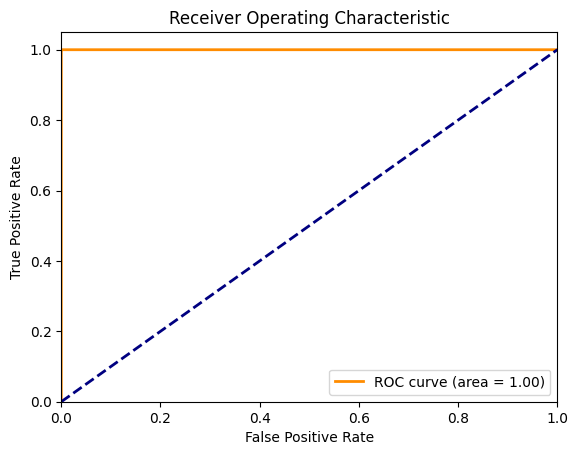

In [43]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.show()